# Health Insurance Cross Sell Prediction 

Predict Health Insurance Owners' who will be interested in Vehicle Insurance


### Context:

Our client is an Insurance company that has provided Health Insurance to its customers now they need help in predicting whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.


An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

 whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### DATA DICTIONARY

VARIABLE	  -              DEFINITION

id	:                 Unique ID for the customer

Gender :	          Gender of the customer


Age :    	          Age of the customer

Driving_License : 	  0 : Customer does not have DL, 1 : Customer already has DL

Region_Code	:         Unique code for the region of the customer

Previously_Insured :  1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age	:         Age of the Vehicle;   1-2 Year : 0, < 1 Year : 1, > 2 Years : 2

Vehicle_Damage :      1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium :      The amount customer needs to pay as premium in the year

PolicySalesChannel :  Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage	:             Number of Days, Customer has been associated with the company

Response :            1 : Customer is interested, 0 : Customer is not interested

## IMPORTING NECESSARY LIBRARIES

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import pointbiserialr ,chi2_contingency

In [3]:
data= pd.read_csv(r'F:\PROJECT\vehicle insurance.csv')
df=data.sample(frac=0.2,random_state= 26)
df1=df.copy()


In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
207742,207743,Male,46,1,28.0,0,1-2 Year,Yes,33854.0,26.0,213,0
185951,185952,Female,36,1,3.0,0,1-2 Year,Yes,26100.0,26.0,168,1
365642,365643,Female,35,1,50.0,0,1-2 Year,Yes,2630.0,124.0,260,0
196094,196095,Male,24,1,28.0,1,< 1 Year,No,36571.0,152.0,84,0
296440,296441,Female,38,1,28.0,0,> 2 Years,Yes,34666.0,124.0,172,0


In [5]:
df.drop(columns=['id','Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)# dropping unique id column as we cannot draw any insights from such columns.

## BASIC INFORMATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76222 entries, 207742 to 291728
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              76222 non-null  object 
 1   Age                 76222 non-null  int64  
 2   Driving_License     76222 non-null  int64  
 3   Previously_Insured  76222 non-null  int64  
 4   Vehicle_Age         76222 non-null  object 
 5   Vehicle_Damage      76222 non-null  object 
 6   Annual_Premium      76222 non-null  float64
 7   Vintage             76222 non-null  int64  
 8   Response            76222 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 5.8+ MB


In [7]:
df.isna().sum()

Gender                0
Age                   0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Vintage               0
Response              0
dtype: int64

In [8]:
print('The data has {} features and {} observations with no null records.'.format(df.shape[1],df.shape[0]))

The data has 9 features and 76222 observations with no null records.


DISCRETE NUMERICAL VARIABLES: 
Age, Vintage

CONTINUOUS NUMERICAL VARIABLES:
Annual_Premium

CATEGORICAL VARIABLES:
Driving_License, Previously_Insured, Region_Code, Policy_Sales_Channel, Response(Target variable)

## DESCRIPTIVE ANALYSIS

In [9]:
df.describe(exclude='O')

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response
count,76222.000000,76222.000000,76222.000000,76222.000000,76222.000000,76222.000000
mean,38.764727,0.997914,0.459041,30578.872425,154.217090,0.122576
std,15.500280,0.045626,0.498323,17205.278738,83.581713,0.327952
min,20.000000,0.000000,0.000000,2630.000000,10.000000,0.000000
25%,25.000000,1.000000,0.000000,24446.250000,82.000000,0.000000
50%,36.000000,1.000000,0.000000,31666.000000,154.000000,0.000000
75%,49.000000,1.000000,1.000000,39340.500000,227.000000,0.000000
max,85.000000,1.000000,1.000000,540165.000000,299.000000,1.000000


Age group of people ranges between 20-85 years.

Most of the people possess driving license.

Majority of the people have already insured their vehicle. We need to target those people who do not have an insurance for their vehicle and convert them into our customers.

The average annual premium for the company's vehicle insurance is Rs. 30578.87 and the insurance premium amount ranges between Rs. 2630-540165

On an average, the company has its customers associated to it from 154 days.



In [10]:
df.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,76222,76222,76222
unique,2,3,2
top,Male,1-2 Year,Yes
freq,41075,39953,38576


The dataset has the majority of observations belonging to the category male. 

Most of the people posses a vehicle from 1-2 years.

Majority of the people have their vehicle's damaged.

ENCODING THE CATEGORICAL VARIABLES

In [11]:
df['Vehicle_Damage'].replace({'No':0,'Yes':1},inplace=True)
df['Vehicle_Age'].replace({'1-2 Year':0,'< 1 Year':1,'> 2 Years':2},inplace=True)

## ANALYSIS

VARIANCE - COVARIANCE MATRIX 

(To have a visual view of the dataset) 

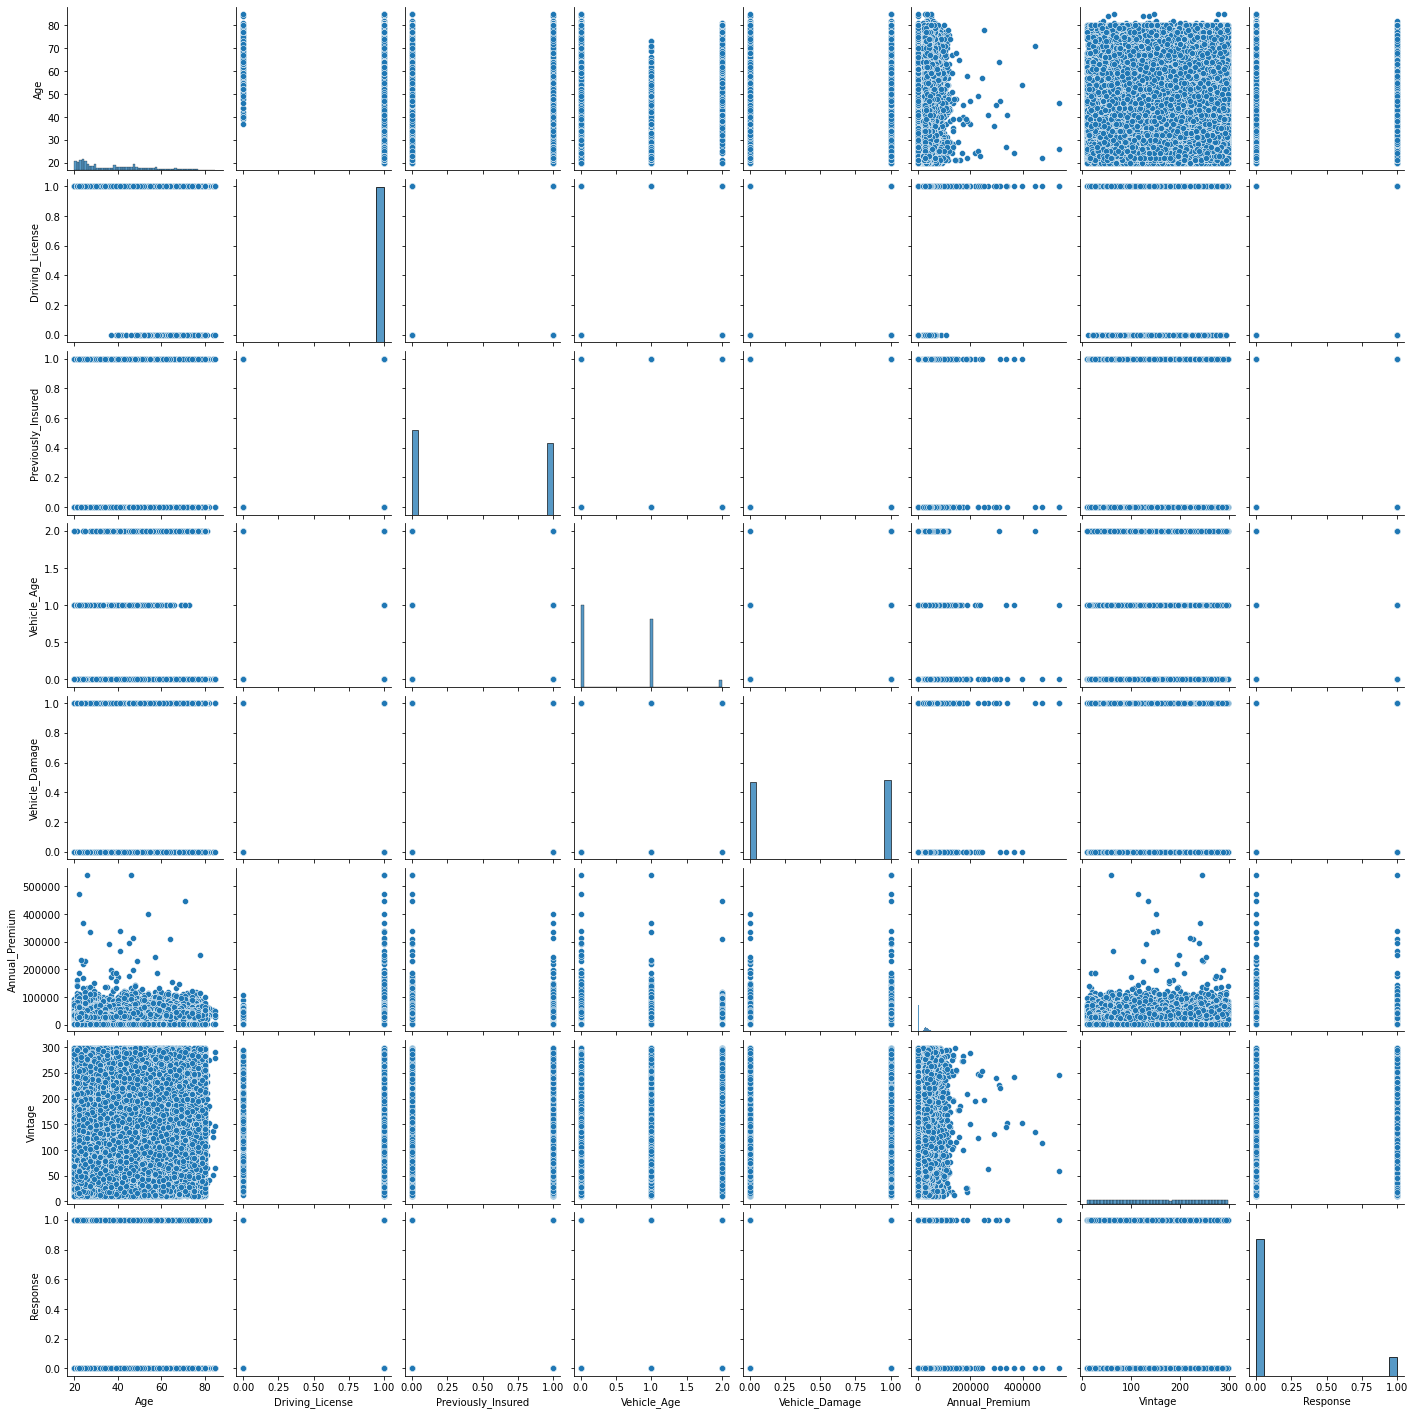

In [12]:
sns.pairplot(data=df)

The variance- covariance matrix shows the relationship between the variables.

The diagonal plots show the variable with itself and the off- diagonal plots show the relation between two variables.

Since most of the features are categorical having classes 0,1; we get the off- diagonal scatterplots with two straight lines.

<AxesSubplot:xlabel='Age', ylabel='Count'>

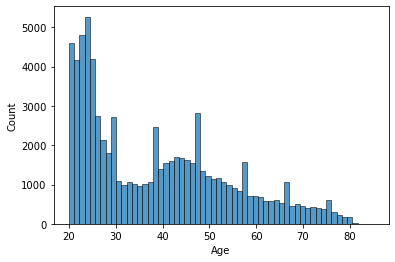

In [13]:
sns.histplot(df.Age)

Majority of the people belong to the age group of 20-50 years

## Finding the proportion of male and female 

,Gender
Male,53.888641
Female,46.111359


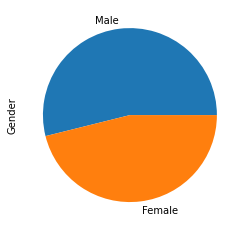

In [14]:
df.Gender.value_counts().plot.pie()
pd.DataFrame(df.Gender.value_counts(normalize=True)*100)

## Finding the count of prospects (males and females to be targeted for getting their vehicle's insured) for the company.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
Gender,,,,,,,,
Female,13878,13878,13878,13878,13878,13878,13878,13878
Male,18047,18047,18047,18047,18047,18047,18047,18047


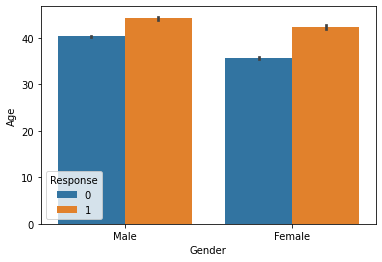

In [15]:
sns.barplot(df.Gender,df.Age,hue=df.Response)
a= df[(df['Response']==0 ) & (df['Previously_Insured']==0 ) ]
a.groupby('Gender').count()


The company is having an opportunity of converting 31925 prospects into their customers (18047 : males and 13878 : females )

## Finding the proportion of people having driving license(1) and not having the driving license(0)  

,Driving_License
1,99.791399
0,0.208601


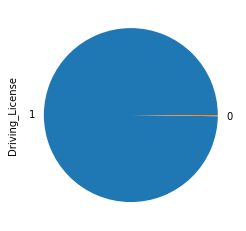

In [16]:
df.Driving_License.value_counts().plot.pie()
pd.DataFrame(df.Driving_License.value_counts(normalize=True)*100)

## Count of people who have already insured their vehicle (1) and those who don't have their vehicle insured(0)

,Previously_Insured
0,54.09593
1,45.90407


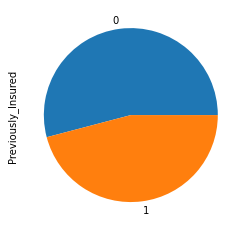

In [17]:
df.Previously_Insured.value_counts().plot.pie()
pd.DataFrame(df.Previously_Insured.value_counts(normalize=True)*100)


## How many people who are having driving license and don't have their vehicle insured? Also find the count of people willing to take the insurance?

In [18]:
df[(df['Driving_License']==1) & (df['Previously_Insured']==0)]


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
207742,Male,46,1,0,0,1,33854.0,213,0
185951,Female,36,1,0,0,1,26100.0,168,1
365642,Female,35,1,0,0,1,2630.0,260,0
296440,Female,38,1,0,2,1,34666.0,172,0
222710,Female,24,1,0,1,1,34103.0,130,1
...,...,...,...,...,...,...,...,...,...
368356,Male,59,1,0,0,1,51992.0,248,0
178409,Male,50,1,0,0,1,37088.0,286,0
351877,Male,23,1,0,1,1,43802.0,196,0
232681,Female,49,1,0,0,0,46173.0,237,0


In [19]:
df[(df['Driving_License']==1) & (df['Previously_Insured']==0) & (df['Response']==1)]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
185951,Female,36,1,0,0,1,26100.0,168,1
222710,Female,24,1,0,1,1,34103.0,130,1
270603,Male,48,1,0,0,1,19976.0,64,1
2791,Male,33,1,0,0,1,23110.0,261,1
83418,Female,26,1,0,1,1,46091.0,256,1
...,...,...,...,...,...,...,...,...,...
119898,Female,40,1,0,0,1,2630.0,204,1
30627,Male,38,1,0,2,1,27830.0,202,1
130242,Female,21,1,0,1,1,24250.0,208,1
364385,Male,41,1,0,2,1,47513.0,65,1


41118 people have driving license but don't have their vehicle insured.

Out of 41118, 9296 are now willing to take the insurance for their vehicle


## Vehicle's Age

,Vehicle_Age
0,52.416625
1,43.431030
2,4.152344


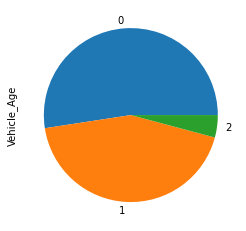

In [20]:
df.Vehicle_Age.value_counts().plot.pie()
pd.DataFrame(df.Vehicle_Age.value_counts(normalize=True)*100)


Majority of the people have vehicle from 1-2 years (0) and a least number of people have vehicle with them from more 2 years.

##  Rate of people who got their vehicle  damaged (1) and not got damaged(0) in the past?

,Vehicle_Damage
1,50.61006
0,49.38994


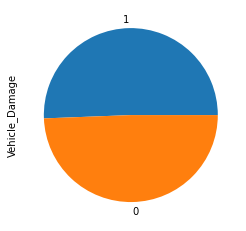

In [21]:
df.Vehicle_Damage.value_counts().plot.pie()
pd.DataFrame(df.Vehicle_Damage.value_counts(normalize=True)*100)

## Show the relation between vehicle's age and damage caused in the past 

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

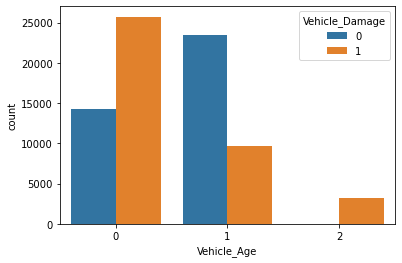

In [22]:
sns.countplot(hue='Vehicle_Damage',x='Vehicle_Age',data=df)


In [23]:
ab=df[df['Vehicle_Damage']==1]
ab.groupby('Vehicle_Age')['Vehicle_Damage'].sum()


Vehicle_Age
0    25716
1     9697
2     3163
Name: Vehicle_Damage, dtype: int64

From the above, we may infer that vehicles are more prone to damages between 1-2 years (0) of its age

## Vehicles of which age group are insured the most? 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

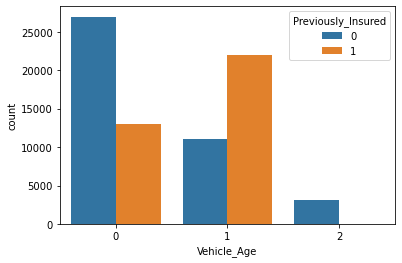

In [24]:
sns.countplot(df.Vehicle_Age,hue=df.Previously_Insured)

Vehicle's with less than 1 year (1) of age are insured the most

## Is there a correlation between customer's previous association with company and those customers taking insurance for their vehicle?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


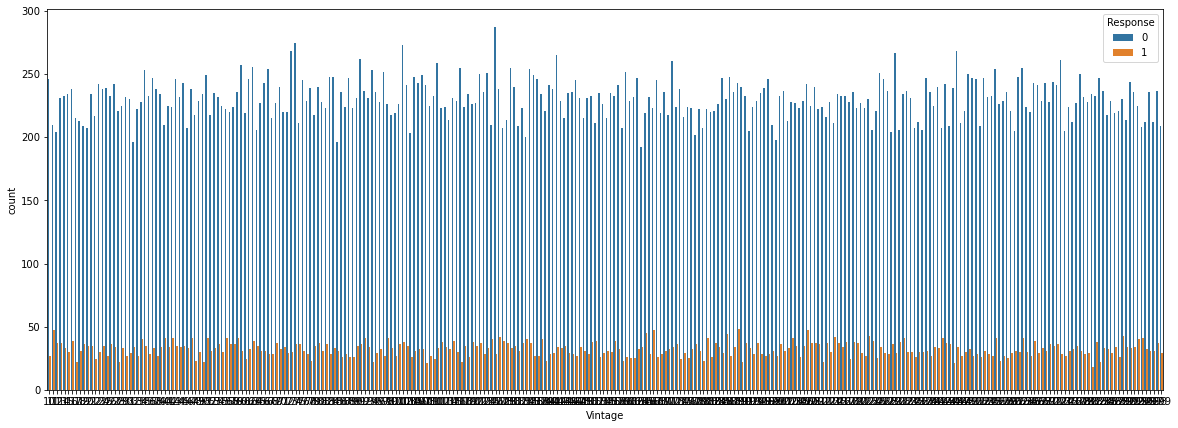

POINT BISERIALR:
 H0: There is no significant correlation
 H1: There is a significant correlation
We accept the H0.
Customer's previous association with company have no influence over those customers taking insurance for their vehicle from the company


In [25]:
plt.figure(figsize=(20,7))
sns.countplot(df.Vintage,hue=df.Response)
plt.show()

c,p= pointbiserialr(df.Vintage,df.Response)
print('POINT BISERIALR:\n H0: There is no significant correlation\n H1: There is a significant correlation')
if p> 0.05:
    print("We accept the H0.\nCustomer's previous association with company have no influence over those customers taking insurance for their vehicle from the company")
else:
    print("We fail to accept the H0.\nCustomer's previous association with company have a high influence over those customers taking insurance for their vehicle from the company")



## How many of the Vehicles were insured that got damaged in the past?

In [26]:
df[(df['Vehicle_Damage']==1) ]


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
207742,Male,46,1,0,0,1,33854.0,213,0
185951,Female,36,1,0,0,1,26100.0,168,1
365642,Female,35,1,0,0,1,2630.0,260,0
296440,Female,38,1,0,2,1,34666.0,172,0
222710,Female,24,1,0,1,1,34103.0,130,1
...,...,...,...,...,...,...,...,...,...
368356,Male,59,1,0,0,1,51992.0,248,0
265790,Male,48,1,1,0,1,37292.0,240,0
178409,Male,50,1,0,0,1,37088.0,286,0
351877,Male,23,1,0,1,1,43802.0,196,0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
25791,Male,60,1,1,0,1,31508.0,40,0
377084,Female,70,1,1,0,1,45464.0,13,0
119355,Female,59,1,1,0,1,38501.0,141,0
340130,Female,62,1,1,0,1,2630.0,42,0
120842,Female,22,1,1,1,1,29725.0,183,0
...,...,...,...,...,...,...,...,...,...
205821,Male,28,1,1,0,1,42994.0,174,0
238229,Male,48,1,1,0,1,29685.0,290,0
274700,Female,61,1,1,0,1,72255.0,20,0
86277,Male,45,1,1,0,1,23294.0,180,0


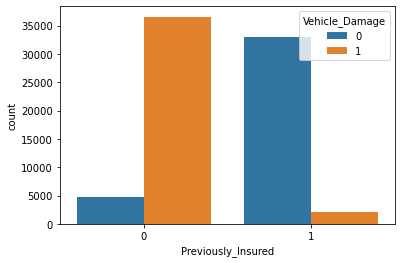

In [27]:
sns.countplot(df.Previously_Insured,hue=df.Vehicle_Damage)
df[(df['Vehicle_Damage']==1) & (df['Previously_Insured']==1)]

Out of 38576 vehicles that got damaged in the past, 2021 were insured previously

## Does the premium amount vary linearly with the vehicle's age and damage caused to the vehicle in the past? 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

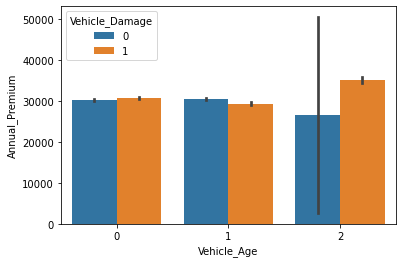

In [28]:
sns.barplot(df.Vehicle_Age,df.Annual_Premium,hue=df.Vehicle_Damage)

In [29]:
premium= df[df['Vehicle_Damage']==1]
pd.pivot_table(data=premium,index='Vehicle_Age',values=['Annual_Premium','Vehicle_Damage'],)


,Annual_Premium,Vehicle_Damage
Vehicle_Age,,
0,30680.105499,1
1,29367.440858,1
2,35256.779640,1


In [30]:
premium.groupby(['Vehicle_Damage','Vehicle_Age'])['Annual_Premium'].mean()


Vehicle_Damage  Vehicle_Age
1               0              30680.105499
                1              29367.440858
                2              35256.779640
Name: Annual_Premium, dtype: float64

With the increase in age of the vehicle that were damaged in the past, the average premium increases

## FEATURE SELECTION

### CORRELATION MATRIX

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


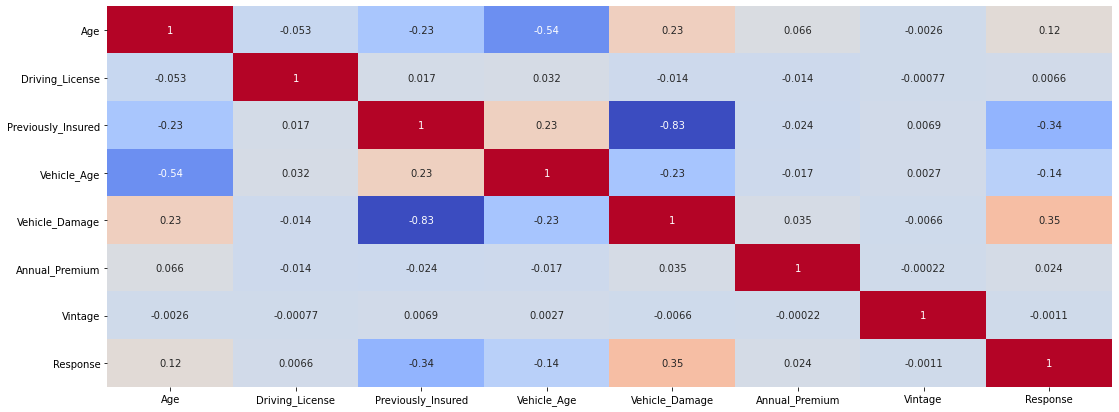

,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
Age,1.000000,-0.053146,-0.225626,-0.540227,0.233605,0.065529,-0.002632,0.121100
Driving_License,-0.053146,1.000000,0.016727,0.031700,-0.013533,-0.014178,-0.000769,0.006567
Previously_Insured,-0.225626,0.016727,1.000000,0.226371,-0.826062,-0.023654,0.006893,-0.341494
Vehicle_Age,-0.540227,0.031700,0.226371,1.000000,-0.229588,-0.017056,0.002666,-0.135760
Vehicle_Damage,0.233605,-0.013533,-0.826062,-0.229588,1.000000,0.034754,-0.006640,0.351548
Annual_Premium,0.065529,-0.014178,-0.023654,-0.017056,0.034754,1.000000,-0.000223,0.024434
Vintage,-0.002632,-0.000769,0.006893,0.002666,-0.006640,-0.000223,1.000000,-0.001061
Response,0.121100,0.006567,-0.341494,-0.135760,0.351548,0.024434,-0.001061,1.000000


In [31]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(method='kendall'),annot=True,cbar=False,cmap='coolwarm')
plt.show()
df.corr(method='kendall')

Vehicle_Damage has the highest impact on people being interested in getting their vehicle's insured.

Pointbiserialr test is used to test the dependency of one categorical attribute and one numerical attribute.

In [32]:
c,p = pointbiserialr(df['Annual_Premium'],df['Response'])
print('POINT BISERIALR:\n H0: There is no significant correlation\n H1: There is a significant correlation')
if p> 0.05:
    print(" We accept the H0.\nAnnual_Premiun has no influence over the people to the insurance.")
else:
    print("We fail to accept the H0.\nAnnual_Premiun has an influence over the people to the insurance.")
print('-'*50)



POINT BISERIALR:
 H0: There is no significant correlation
 H1: There is a significant correlation
We fail to accept the H0.
Annual_Premiun has an influence over the people to the insurance.
--------------------------------------------------


### Chisquare test is used to test the dependency of two categorical attributes.

 we accept null hypothesis when there is no dependency between the categorical variables passed as parameters.

In [33]:
for i in df.drop(columns=['Response','Annual_Premium'],axis=1).columns:
    a= pd.crosstab(df[i],df["Response"])
    chi2, Pvalue, dof, ex=chi2_contingency(a)
    print('Dependency between Response and ',i)
    print('Pvalue:',p,',','Degree of Freedom:',dof)
    if Pvalue>0.05:
        print('Not significant: There is no dependency between Response and', i)
    else:
        print('Significant: There is a dependency between Response and', i)
    print('-'*50)
    

Dependency between Response and  Gender
Pvalue: 5.400097290162318e-08 , Degree of Freedom: 1
Significant: There is a dependency between Response and Gender
--------------------------------------------------
Dependency between Response and  Age
Pvalue: 5.400097290162318e-08 , Degree of Freedom: 64
Significant: There is a dependency between Response and Age
--------------------------------------------------
Dependency between Response and  Driving_License
Pvalue: 5.400097290162318e-08 , Degree of Freedom: 1
Not significant: There is no dependency between Response and Driving_License
--------------------------------------------------
Dependency between Response and  Previously_Insured
Pvalue: 5.400097290162318e-08 , Degree of Freedom: 1
Significant: There is a dependency between Response and Previously_Insured
--------------------------------------------------
Dependency between Response and  Vehicle_Age
Pvalue: 5.400097290162318e-08 , Degree of Freedom: 2
Significant: There is a dependen

From the above, we infer that Gender,Age,Previously_Insured,Annual_premium,Vehicle_Age and Vehicle_Damage have an impact on the response of the people i.e. interested in vehicle insurance , except the attributes Vintage and Driving_License. 